# Task-1 Prediction using Supervised ML

(Level - Beginner)


### Objective: Predict the percentage of an student based on the no. of study hours. You can use R, Python, SAS Enterprise Miner or any other tool.

## Submitted by - Aditi Singhal






        

    


### Importing Required Libraries

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


### Reading the data 

In [3]:
df = pd.read_csv("student_scores - student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

### Plotting the data 

To get better visualization of the data

Text(0, 0.5, 'Percentage Scored')

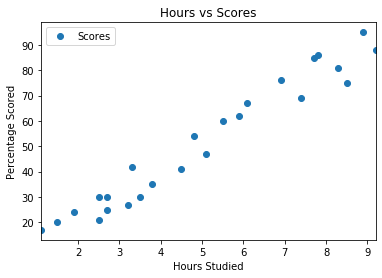

In [5]:
df.plot(x='Hours', y='Scores', style = 'o')
plt.title ("Hours vs Scores")
plt.xlabel ("Hours Studied")
plt.ylabel ("Percentage Scored")

From this graph we can see that percentage that a student score depends linearly on the number of hours student devoted to studies. So, I will use simple linear regression for predicting the student scores.

Here, hours is the independent variable and scores is the dependent variable. 

### Preparing the data

Dividing the data into attributes i.e. input and labels i.e. output. 

In [6]:
X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

print("Data distributed")

Data distributed


Now, spliting the data into train and test set 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Data Split done")

Data Split done


### Training the Linear Regression Algorithm

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the output

Now, predicting the output using my trained model on the test set.

In [18]:
y_pred = reg.predict(X_test)

print('Coefficients: ', reg.coef_)

Coefficients:  [9.91065648]


In [32]:
#predicting score for a student
hours = 9.25
stud_pred = reg.predict([[hours]])
print('Scores of the student who studies ' + str(hours) +' hrs/day: '+ str(stud_pred))

Scores of the student who studies 9.25 hrs/day: [93.69173249]


### Evaluating the model

In [19]:
#calculating the mean squared error
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 21.60


In [20]:
#Calculating the variance score
print('Variance score: %.2f' % reg.score(X_test, y_test))

Variance score: 0.95


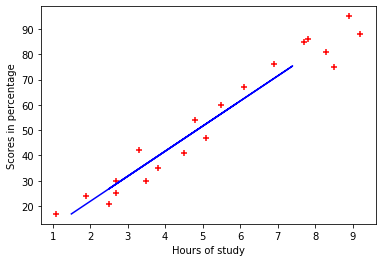

In [24]:
#these line of codes will make a scatter plot

plt.xlabel('Hours of study')
plt.ylabel('Scores in percentage')
plt.scatter(X_train , y_train, color='red', marker='+')

#to get a straight line which gives the least error

plt.plot(X_test, y_pred, color='b')